Krista Miller
Midterm exam COMP 4433 Fall 2021

You are going to create a Jupyter notebook that has all the code, printout and plots and you will submit it via Canvas.

Question 1)  Read testdata.csv into a pandas dataframe named df.  Print the dataframe.

In [1]:
import pandas as pd
df = pd.read_csv('testdata.csv')
df

,day,BTS_ID,Drop_Pct,MB
0,2021-09-02,10-1,0.416402,17026.331845
1,2021-09-02,10-2,0.262740,23285.947580
2,2021-09-02,100-1,0.769819,88041.920893
3,2021-09-02,100-2,0.915886,17158.915532
4,2021-09-02,100-3,0.701429,27675.127768
...,...,...,...,...
745,2021-09-26,116-2,0.587084,11774.730405
746,2021-09-26,116-3,0.422314,10000.305205
747,2021-09-26,119-7,1.355579,88.749320
748,2021-09-26,119-8,0.709220,25469.948131


Question 2)  Change the day field to date time then print out only the MB column from September 26th forward where the BTS_ID is "10-1". Print just the value, not the pandas column with all the other info. The output should be just the number 41081.092807, no other information.

In [2]:
df['day']= pd.to_datetime(df['day'])

print(float(df[(df['day']>= '2021-9-26') & (df['BTS_ID']== '10-1')]["MB"].values))


41081.092807


Question 3)  Change the index to be the 'day' field and drop the day field from the columns and then plot the dataframe for just BTS_ID "10-1". Make sure you have x and y axis labels, a legend and a title. Create a secondary y-axis so that the drop percent and MB values are using a different axis.  You get a bonus point if you make the x-axis tic labels something better than what is shown below.

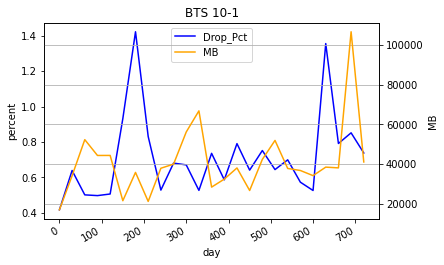

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

#df.set_index('day', inplace=True)
df2= df[df.BTS_ID== '10-1']

fig,ax= plt.subplots()
plt.plot(df2.Drop_Pct, color= 'blue', label='Drop_Pct')
ax.set_xlabel('day')
ax.set_ylabel('percent')
fig.autofmt_xdate()

ax2= ax.twinx()
plt.plot(df2.MB, color= 'orange', label='MB')
ax2.set_ylabel('MB')
ax2.yaxis.grid()
plt.title('BTS 10-1')
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
plt.show()


Question 4)  Now group by BTS_ID and find the mean of the MB's and Drop Percent. Put this in a side-by-side bar chart only for the following BTS_ID's: '10-1','10-2','100-1','100-2','100-3'. Labels and title as shown in picture.  Hints: This has a secondary y-axis, I suggest ax2-ax.twinx().  After you groupby, the BTS_ID column is gone and the index has the BTS_ID's.  Access the index values with df.index not df['BTS_ID'] or df.BTS_ID.

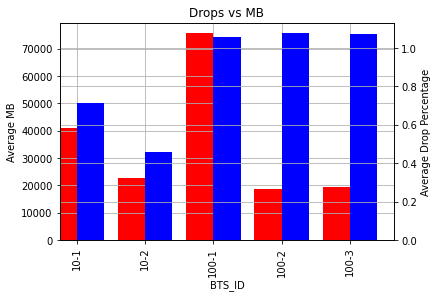

In [4]:
df3= df.groupby(['BTS_ID'])['MB'].mean().reset_index()
df4= df.groupby(['BTS_ID'])['Drop_Pct'].mean().reset_index()

df5= pd.merge(df3, df4, on='BTS_ID')
df6= df5.iloc[0:5]
#print(df6)

fig= plt.figure()
ax= fig.add_subplot(111)
ax2= ax.twinx()
width=0.4
df6.MB.plot(kind= 'bar', color='red', ax=ax, width=width, position=1)
df6.Drop_Pct.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Average MB')
ax2.set_ylabel('Average Drop Percentage')
ax.set_xticklabels(df6['BTS_ID'])
ax.set_xlabel('BTS_ID')
ax2.yaxis.grid()
ax.yaxis.grid()
ax.xaxis.grid()

plt.title('Drops vs MB')
plt.show()



Question 5)  Use Seaborn to plot MB vs Drop Percentage and add a linear regression line. Only plot for BTS_ID's 10-1 and 10-2. Use the Set1 palette and get the col parameter from BTS_ID (make one plot per value in BTS_ID). Seaborn style is 'whitegrid'. Set the hue from the BTS_ID field.

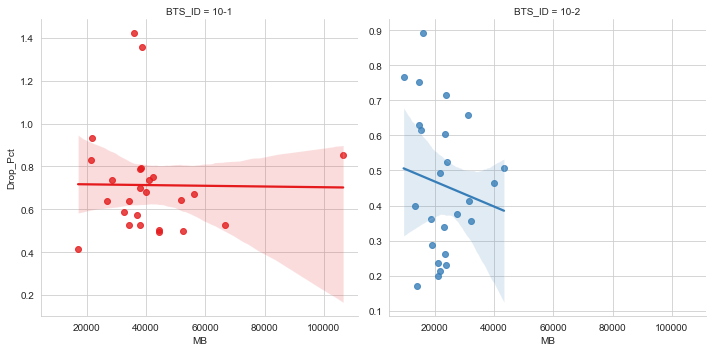

In [5]:
import seaborn as sns
df7= df[df.BTS_ID== '10-2']

#df2= BTS_ID=10-1
#df7= BTS_ID=10-2

df8= pd.concat([df2, df7])

sns.set_style('whitegrid')
lm= sns.lmplot(x='MB', y='Drop_Pct', data=df8, col='BTS_ID', hue= 'BTS_ID', facet_kws={'sharey': False, 'sharex': True}, palette= 'Set1')



Question 6)  
Part 1) set the numpy random seed to 42 so you get the same results. Create a 3x3 array with the values [[1,2,3],[4,5,6],[7,8,9]]. Create another 3x3 array with random normals, mean zero, standard deviation of 1.¶
Part 2) set z to be the dot product of x and y
Part 3) calculate the column means and column standard deviations for z and print them out
Part 4) calculate the rows means and assign to w
Part 5) Calculate the element wise multiplication of w and z, assign it to wz and print wz
Part 6) in your comments, explain why the resulting array is 3x3.  Hint: broadcasting…
Part 7) print the bottom right value of the w times z array
Part 8) Change the value of the bottom right element of the w times z array by dividing it by the mean of that row. Then print just the last row of the array.


In [22]:
#todo: part 8

import numpy as np
np.random.seed(42)

#part 1:
x= np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

y= np.random.normal(loc=0, scale=1, size= (3,3))

print("x: ", x)
print("y: ", y)

#part 2:
#z is the dot product of x and y
z= np.dot(x,y)
print("z: ", z)

#part 3:
#calculate the column means and column standard deviations for z and
#print them out

z_means= z.mean(axis=0)
print("z column means: ", z_means)
z_std= z.std(axis=0)
print("z column std dev: ", z_std)

#part4:
#calculate the rows means and assign to w
w= z.mean(axis=1)
print("w: ", w)

#part5:
#calculate the element wise multiplication of w and z, assign
#it to wz and print wz
wz= np.multiply(w, z)
print("wz: ", wz)

#part6:
#in your comments, explain why the resulting array is 3x3. 
#hint= broadcasting...
print("The resulting array is 3x3 because stacks of matrices are broadcast together as if the matrices were elements.")

#part7:
#print the bottom right value of the wz array
print("bottom right: ", wz[2,2])

#part8:
#change the bottom right element of the wz array by dividing it by 
#the mean of that row.  then print just last row of the array
wz[2,2]=(wz[2,2]/w[2])
print("wz after dividing last element by row mean:", wz[2])

x:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
y:  [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]]
z:  [[ 8.28041231  1.69573314 -1.22900853]
 [19.07728279  2.8807843  -1.39677695]
 [29.87415326  4.06583546 -1.56454536]]
z column means:  [19.07728279  2.8807843  -1.39677695]
z column std dev:  [8.81560783 0.96759022 0.13698234]
w:  [ 2.91571231  6.85376338 10.79181445]
wz:  [[ 24.14330007  11.62215367 -13.26323205]
 [ 55.62386817  19.74421391 -15.07375765]
 [ 87.10443627  27.86627415 -16.88428325]]
The resulting array is 3x3 because stacks of matrices are broadcast together as if the matrices were elements.
bottom right:  -16.884283251711523
wz after dividing last element by row mean: [87.10443627 27.86627415 -1.56454536]


Question 7)  Make a Seaborn pairplot using breastCancerData.csv. Use the following columns for data: ['radius_mean','texture_mean','area_mean','symmetry_mean','concavity_mean']. Use the diagnosis column for the hue.
The plots should be kde (kernel density estimates) using a default number of contours. The plots on the diagonal should be histograms using the default number of bins. Use: sns.set(style = 'whitegrid', palette='bright') to set the style and palette.


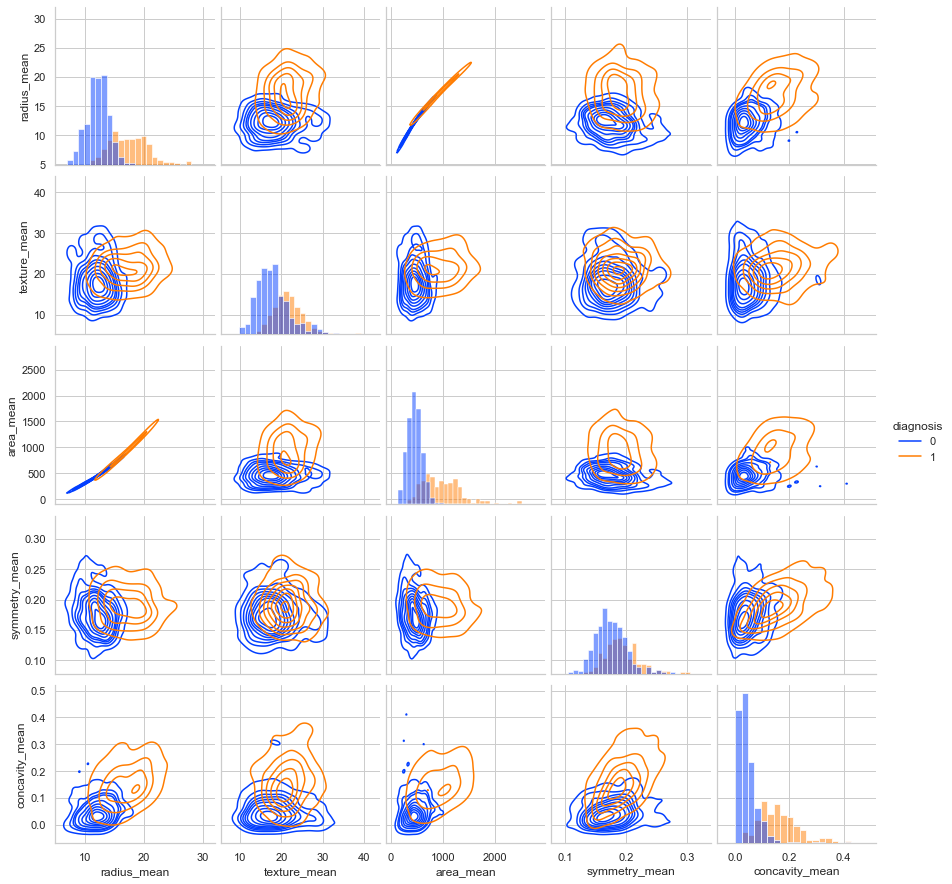

In [7]:
import numpy as np

cancer = pd.read_csv('breastCancerData.csv')
cancer['diagnosis'] = cancer['diagnosis'].apply(lambda x: 0 if x=='B' else 1)
cancer_filter= cancer[['diagnosis','radius_mean', 'texture_mean', 'area_mean', 'symmetry_mean', 'concavity_mean']]

#cancer_filter
sns.set(style= 'whitegrid', palette= 'bright')
sns.pairplot(cancer_filter, hue='diagnosis', palette='bright', kind= 'kde', diag_kind='hist')

Question 8)  I suggest you read in testdata.csv to df from the csv again in case you changed it earlier. Change the day field to datetime. Then filter on the day column so you only have dates later than 2021-09-19. Then filter so you only have BTS_ID's 100-1, 100-2, 100-3. Pivot the BTS dataframe so the BTS_ID values are the column names, the day is the index and MB's are the values. Once you have created your pivot table called dfpivot, then create a bar plot showing each BTS ID as a different color bar, grouped by the day.

BTS_ID              100-1         100-2         100-3
day                                                  
2021-09-19  123256.200117  19120.034171  19424.804032
2021-09-20   99330.040182  17684.321834  15990.549081
2021-09-21   84560.215209  15240.478969  13099.391180
2021-09-22   69649.082367  19323.319832  15154.284257
2021-09-23   95824.056055  22028.736982  20421.073907
2021-09-24   95016.458831  14624.297480  27147.178182
2021-09-25  103778.382467  16326.798406  18733.418794
2021-09-26   76210.292668  38056.456543  12403.227444


<AxesSubplot:xlabel='day'>

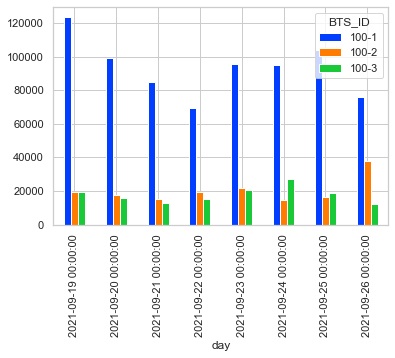

In [8]:
dft = pd.read_csv('testdata.csv')
dft['day']= pd.to_datetime(dft['day'])
dfx=(dft[(dft['day']>= '2021-9-19') & (((dft['BTS_ID']== '100-1')))])
dfy=(dft[(dft['day']>= '2021-9-19') & (((dft['BTS_ID']== '100-2')))])
dfz=(dft[(dft['day']>= '2021-9-19') & (((dft['BTS_ID']== '100-3')))])

frame= [dfx, dfy, dfz]

BTS= pd.DataFrame()

for df in frame:
    BTS= BTS.append(df)

dfpivot= pd.pivot_table(BTS, index=['day'], columns=['BTS_ID'], values='MB')
print(dfpivot)

dfpivot.plot(kind='bar')


Question 9)  Use pandas melt to modify the BTS dataframe so day and BTS_ID are the id_vars and MB and Drop_Pct are the value vars. Print the melted dataframe.
Now apply a function to the melted dataframe. This function should look at the variable column and if it is 'MB' return that value divided by ten. If the variable column is 'Drop_Pct', then return the value times 10. The returned value should be put in a new column in the dfmelt dataframe called 'DropMB_val'.


In [9]:
BTS = pd.read_csv('testdata.csv')
BTS['day']= pd.to_datetime(BTS['day'])
dfmelt= pd.melt(BTS, id_vars=['day','BTS_ID'], value_vars=['MB', 'Drop_Pct'])

dfmelt.loc[dfmelt['variable']=='MB','DropMB_val']= np.divide(dfmelt['value'],10)
dfmelt.loc[dfmelt['variable']=='Drop_Pct','DropMB_val']= np.multiply(dfmelt['value'],1000)
dfmelt

,day,BTS_ID,variable,value,DropMB_val
0,2021-09-02,10-1,MB,17026.331845,1702.633184
1,2021-09-02,10-2,MB,23285.947580,2328.594758
2,2021-09-02,100-1,MB,88041.920893,8804.192089
3,2021-09-02,100-2,MB,17158.915532,1715.891553
4,2021-09-02,100-3,MB,27675.127768,2767.512777
...,...,...,...,...,...
1495,2021-09-26,116-2,Drop_Pct,0.587084,587.084149
1496,2021-09-26,116-3,Drop_Pct,0.422314,422.313887
1497,2021-09-26,119-7,Drop_Pct,1.355579,1355.578728
1498,2021-09-26,119-8,Drop_Pct,0.709220,709.219858


Question 10)  Scatter plot the day vs DropMB_val using Seabourn FacetGrid and color code the scatter plot on the variable (MB or Drop_Pct). Rotate the x-axis labels 30 degrees so they don't overlap. Convert the day to datetime values. In Seaborn, you will set hue to the 'variable' column. Create a list of the possible values in the variable column to var1 and set hue_order = var1. Also, set the aspect=2.0 so it is more legible.  Set the title to “Question 10” and rotate the dates on the x-axis 30 degrees.

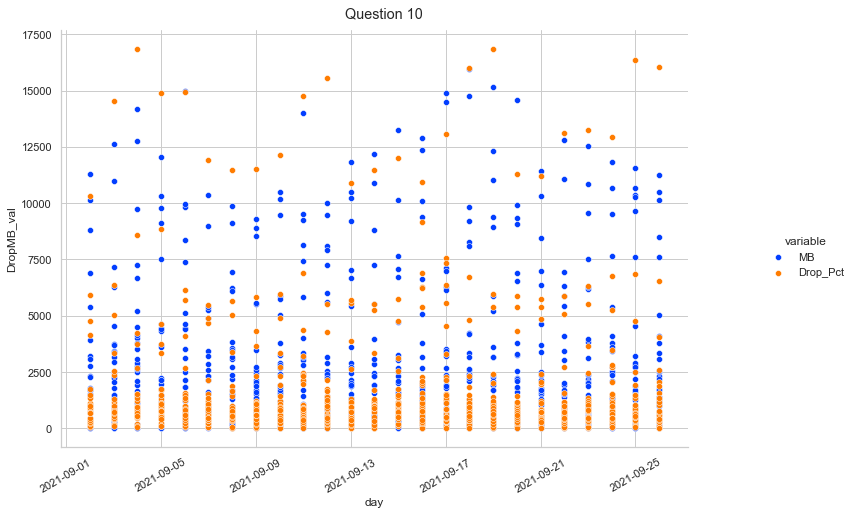

In [11]:
sns.set(style = 'whitegrid', palette='bright') 

var = dfmelt['variable'].unique().tolist()
g = sns.FacetGrid(data=dfmelt, hue='variable', hue_order=var, aspect=2)
g.map_dataframe(sns.scatterplot, x="day", y="DropMB_val")
g.add_legend()
g.fig.suptitle('Question 10')
plt.xticks(rotation=30)
plt.gcf().set_size_inches(13, 8)


Question 11)  Use the testdata.csv file and map the sum of MB's per state in a choropleth map.  You will have to inner join the testdata.csv data with sites.csv to get the latitude and longitude of each site.  The sites.csv file has the BTS ID, but not the sector.  For example, site 100 has three sectors, 100-1, 100-2 and 100-3.  You need to merge the two dataframes on just the part of the BTS ID that is before the "-".  So, bts_id == BTS_ID.split('-')[0].  Look at the example from week5 to see how to do this in pandas.  The data frame should look like this:

Once you have joined these dataframes into a dataframe called dfjoined, then you will use shapely to create a 'Point' column in the dataframe with a point for each BTS.  Create a function that returns a shapely Point when given a row from the dataframe dfjoined.  Use dfjoined.apply to apply that function to each row and put the return value into a column called 'Point'.  Here is the dfjoined dataframe after adding the points:



In [13]:
import pandas as pd

dftest = pd.read_csv('testdata.csv')
dftest= dftest.astype({"BTS_ID": str})
sites= pd.read_csv('sites.csv')
sites= sites.astype({"bts_id": str})
print(dftest.dtypes)
print(sites.dtypes)

#maybe change datatypes
#btsdict= dict(zip(dftest['BTS_ID'], sites['bts_id'].str.split('-', expand=True)[0]))
#print(btsdict)

print(dftest)
print(sites.head())

day          object
BTS_ID       object
Drop_Pct    float64
MB          float64
dtype: object
bts_id        object
latitude     float64
longitude    float64
dtype: object
            day BTS_ID  Drop_Pct            MB
0    2021-09-02   10-1  0.416402  17026.331845
1    2021-09-02   10-2  0.262740  23285.947580
2    2021-09-02  100-1  0.769819  88041.920893
3    2021-09-02  100-2  0.915886  17158.915532
4    2021-09-02  100-3  0.701429  27675.127768
..          ...    ...       ...           ...
745  2021-09-26  116-2  0.587084  11774.730405
746  2021-09-26  116-3  0.422314  10000.305205
747  2021-09-26  119-7  1.355579     88.749320
748  2021-09-26  119-8  0.709220  25469.948131
749  2021-09-26  119-9  0.753769      8.498817

[750 rows x 4 columns]
  bts_id   latitude   longitude
0   1104  29.268528 -103.302481
1   1102  29.313299 -103.671997
2   1100  29.326200 -103.532997
3   1101  29.479601 -103.213997
4    241  31.498964 -111.549049
